<a href="https://colab.research.google.com/github/Pranav910/Deep-Learning-using-Python/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
  This is an example of a simple Linear Regression model using pytorch library.
  This is the first ever model I have created using pytorch specifically.

"""

In [ ]:
# importing necessary modules

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

* We will create a simple class for defining our simple linear regression model
* by simply making it the subclass of the torch.nn.Module as its base class.

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

* Creating a simple linear dataset using numpy.

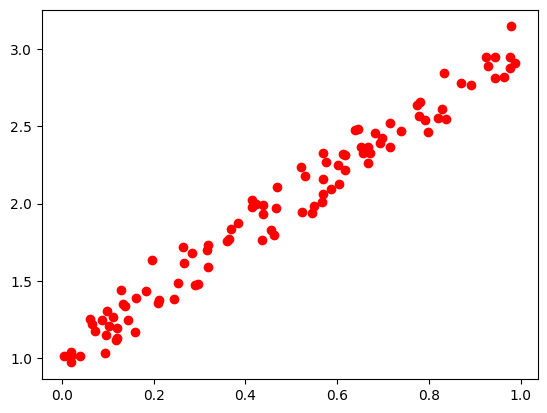

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1).astype(np.float32)
y = 2 * x + 1 + np.random.normal(0, 0.1, (100, 1)).astype(np.float32)

plt.plot(x, y, 'ro', label="Original Data")

* Splitting the dataset into training and testing set.

In [ ]:
x_train = torch.from_numpy(x[:80])
y_train = torch.from_numpy(y[:80])

x_test = torch.from_numpy(x[80:])
y_test = torch.from_numpy(y[80:])

In [ ]:
# Now we will make an instance of the LinearRegression class.
# And also we will select the loss function and the optimizer for our model.

model = LinearRegression(input_dim=1, output_dim=1)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # lr represents the learning rate of our model.

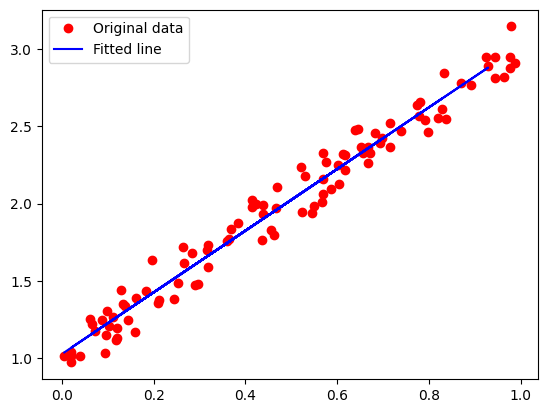

In [ ]:
# Now finally we will train our model.

epochs = 1000

for i in range(epochs):
  pred = model(x_train)
  loss = criterion(pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # if i % 10 == 0:
  #   print(f"Epoch {i} loss: {loss.item()}")

y_pred = model(x_test)
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x_test, y_pred.detach().numpy(), 'b', label='Fitted line')
plt.legend()
plt.show()